In [39]:
from os import listdir, makedirs
from math import ceil
import numpy as np
from os.path import join, exists, split, splitext
from PIL import Image
import get_im
from skimage import morphology
from sklearn.cluster import KMeans

In [2]:
# set path
pth = r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\1.25x'
pth

'\\\\fatherserverdw\\Q\\research\\images\\CLUE\\3D study\\he\\1.25x'

In [3]:
# set default values
sk = 1
E = 1
IHC = 0
tpout = 'tif'

In [4]:
# get image list
imlist = []
for file in listdir(pth):
    if file.endswith(".jpg"):
        imlist.append(file)

In [15]:
# calculate center image and order
zc = ceil(len(imlist)/2); # center image index

rf= np.arange(zc,1,-sk).tolist() + np.arange(zc,len(imlist),sk).tolist() + [0]
mv=np.arange(zc-sk,1,-sk).tolist() + np.arange(zc+sk,len(imlist)+1,sk).tolist()

In [16]:
# elastic registration settings
# regE = [551, 100, 175]
regE_szE = 551
regE_bfE = 100
regE_diE = 175

In [18]:
# find max size of images in list
width = []
height = []
for kk in range(len(imlist)):
    impath = join(pth, imlist[kk])
    w,h = Image.open(impath).size
    width.append(w)
    height.append(h)
szz = [max(height),max(width)]
szz

[2793, 5606]

In [9]:
# global registration settings
padall=200 # padding around all images
#if IHC==1:
#    rsc=4
#elif IHC==2:
#    rsc=10
#else:
rsc=6

iternum=5 # max iterations of registration calculation

In [10]:
# define outputs
outpthG=join(pth, 'registered')
outpthE=join(outpthG, 'elastic registration')
matpth=join(outpthE,'save_warps')
#makedirs(outpthG)
#makedirs(matpth)
#makedirs(outpthE)

In [11]:
# set up center image
nm=imlist[zc] # filename
# tp = imlist[zc][-3:] # extension

imzc,TAzc=get_ims(pth,nm)


In [41]:
im = Image.open(join(pth,nm))
im.show()

In [49]:
# testing find_tissue_area
imarr = np.array(im)
data = imarr[:, :, 2].ravel()
kmeans = KMeans(n_clusters=2).fit(data.reshape(-1, 1))
kmeans.predict(data.reshape(-1, 1))
threshold_value = kmeans.cluster_centers_[0] - (kmeans.cluster_centers_[0] - kmeans.cluster_centers_[1]) / 4
immsk = np.zeros_like(imarr[:, :, 0])
immsk[imarr[:, :, 2] < threshold_value] = 1
immsk2 = morphology.binary_closing(immsk)
immsk3 = morphology.area_opening(immsk2, area_threshold=100000)
immsk4 = morphology.area_closing(immsk3, area_threshold=1000)
#base, fn = split(im)
#fn, ext = splitext(fn)
#dstfn = os.path.join(dst, fn + '.png')
#Image.fromarray((data * 255).astype('uint8')).save(dstfn)


AttributeError: 'numpy.ndarray' object has no attribute 'show'

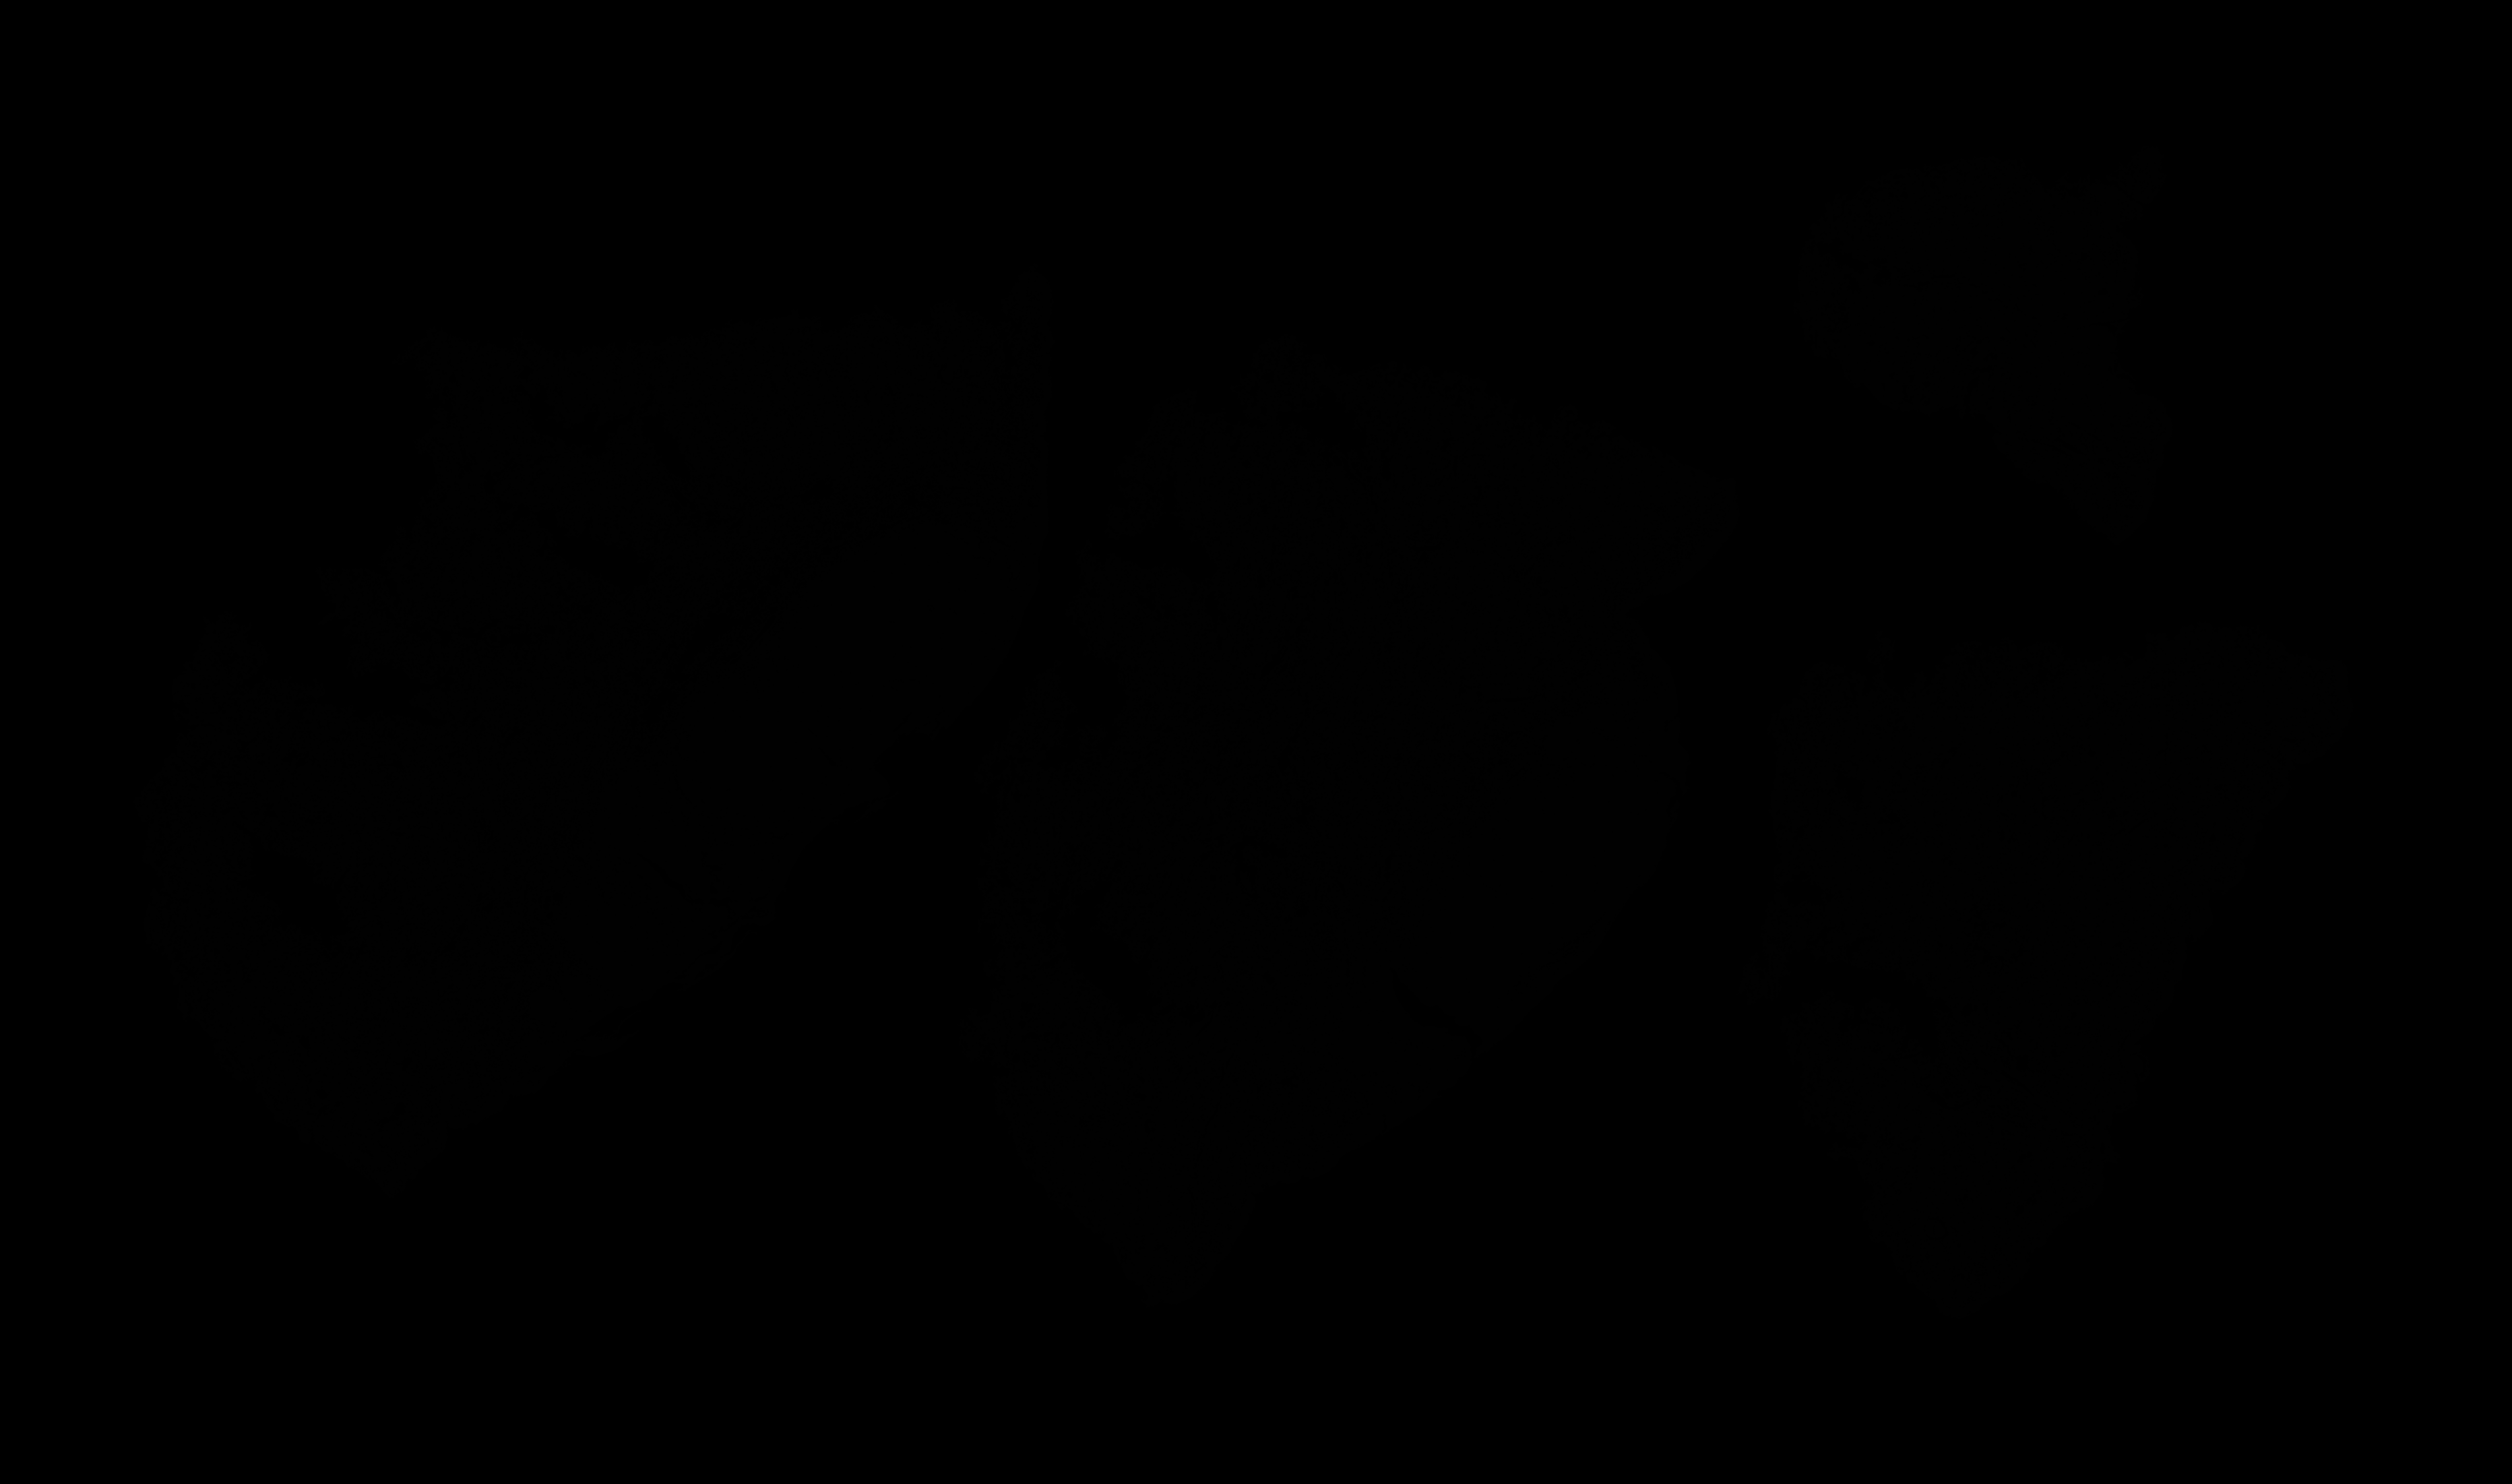